# Predicting Graduate University Admission Probability using Regression Models

**Author :** Borneel Bikash Phukan

**Model Accuracy Obtained:**

1. ***Multiple Regression:*** 0.76
2. ***Artificial Neural Network:*** 0.70
3. ***Decision Tree Regression:*** 0.77
4.  ***Random Forest Regression:*** 0.64

**Model Key Performance Indicators (KPI)**
1. **Root Mean Squared Error** : 0.475000
2. **Mean Squared Error** : 0.225991
3. **Root Mean Absolute Error** : 0.356243
4. **Adjusted R2 Error** : 0.738442

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

# Exploratory Data Analysis

In [2]:
dataset = pd.read_csv('Admission_Predict.csv')
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
dataset = dataset.drop('Serial No.', axis = 1)
dataset

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
dataset.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [6]:
dataset.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
university = dataset.groupby(by = 'University Rating').mean()
university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39bf3a07f0>,
      dtype=object)

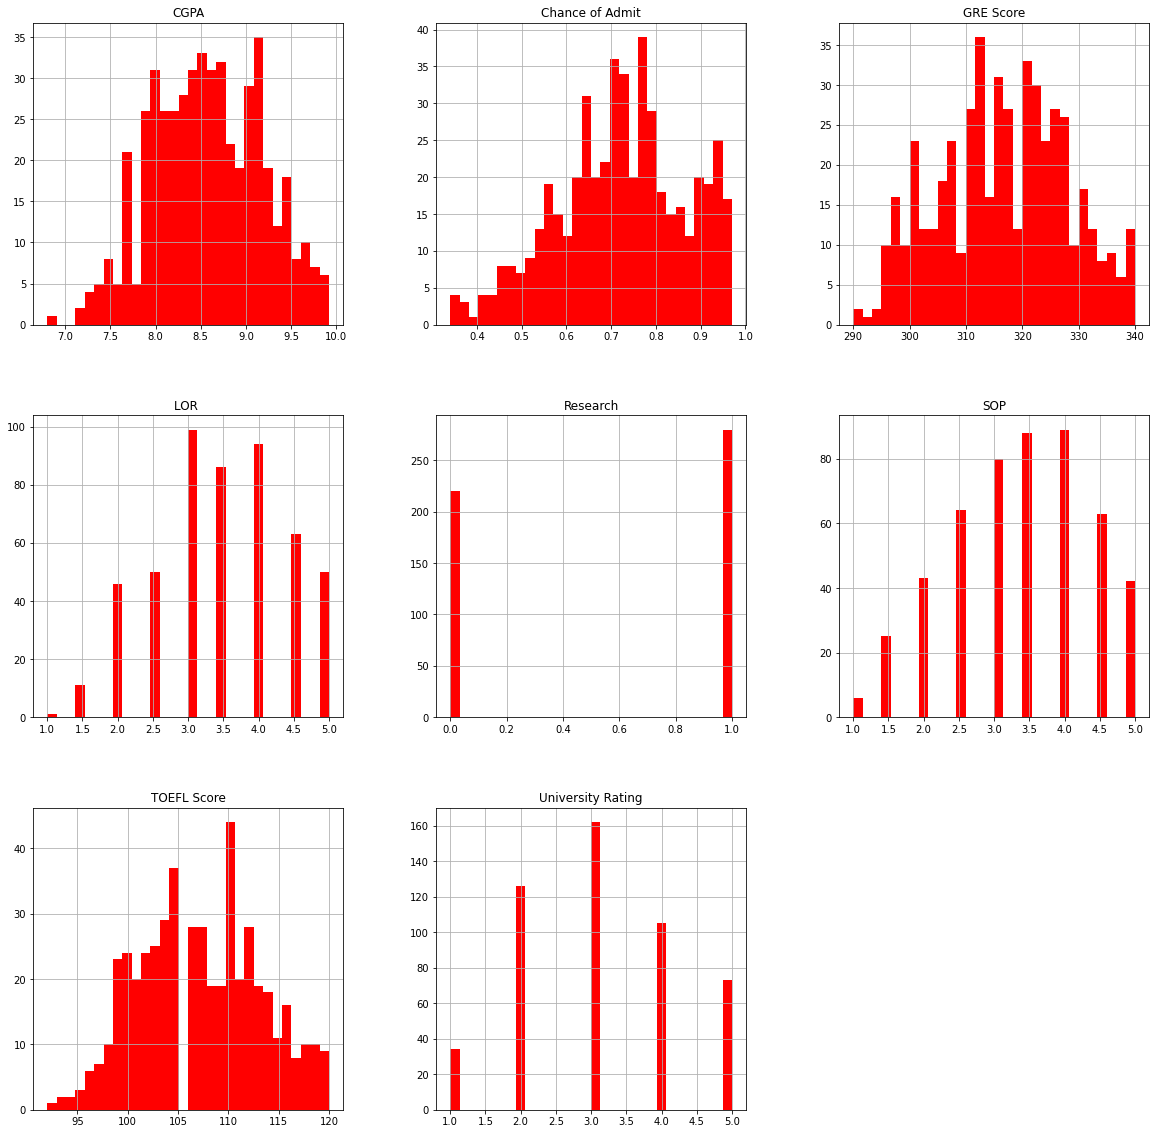

In [8]:
dataset.hist(bins = 30, figsize=(20,20), color='r')

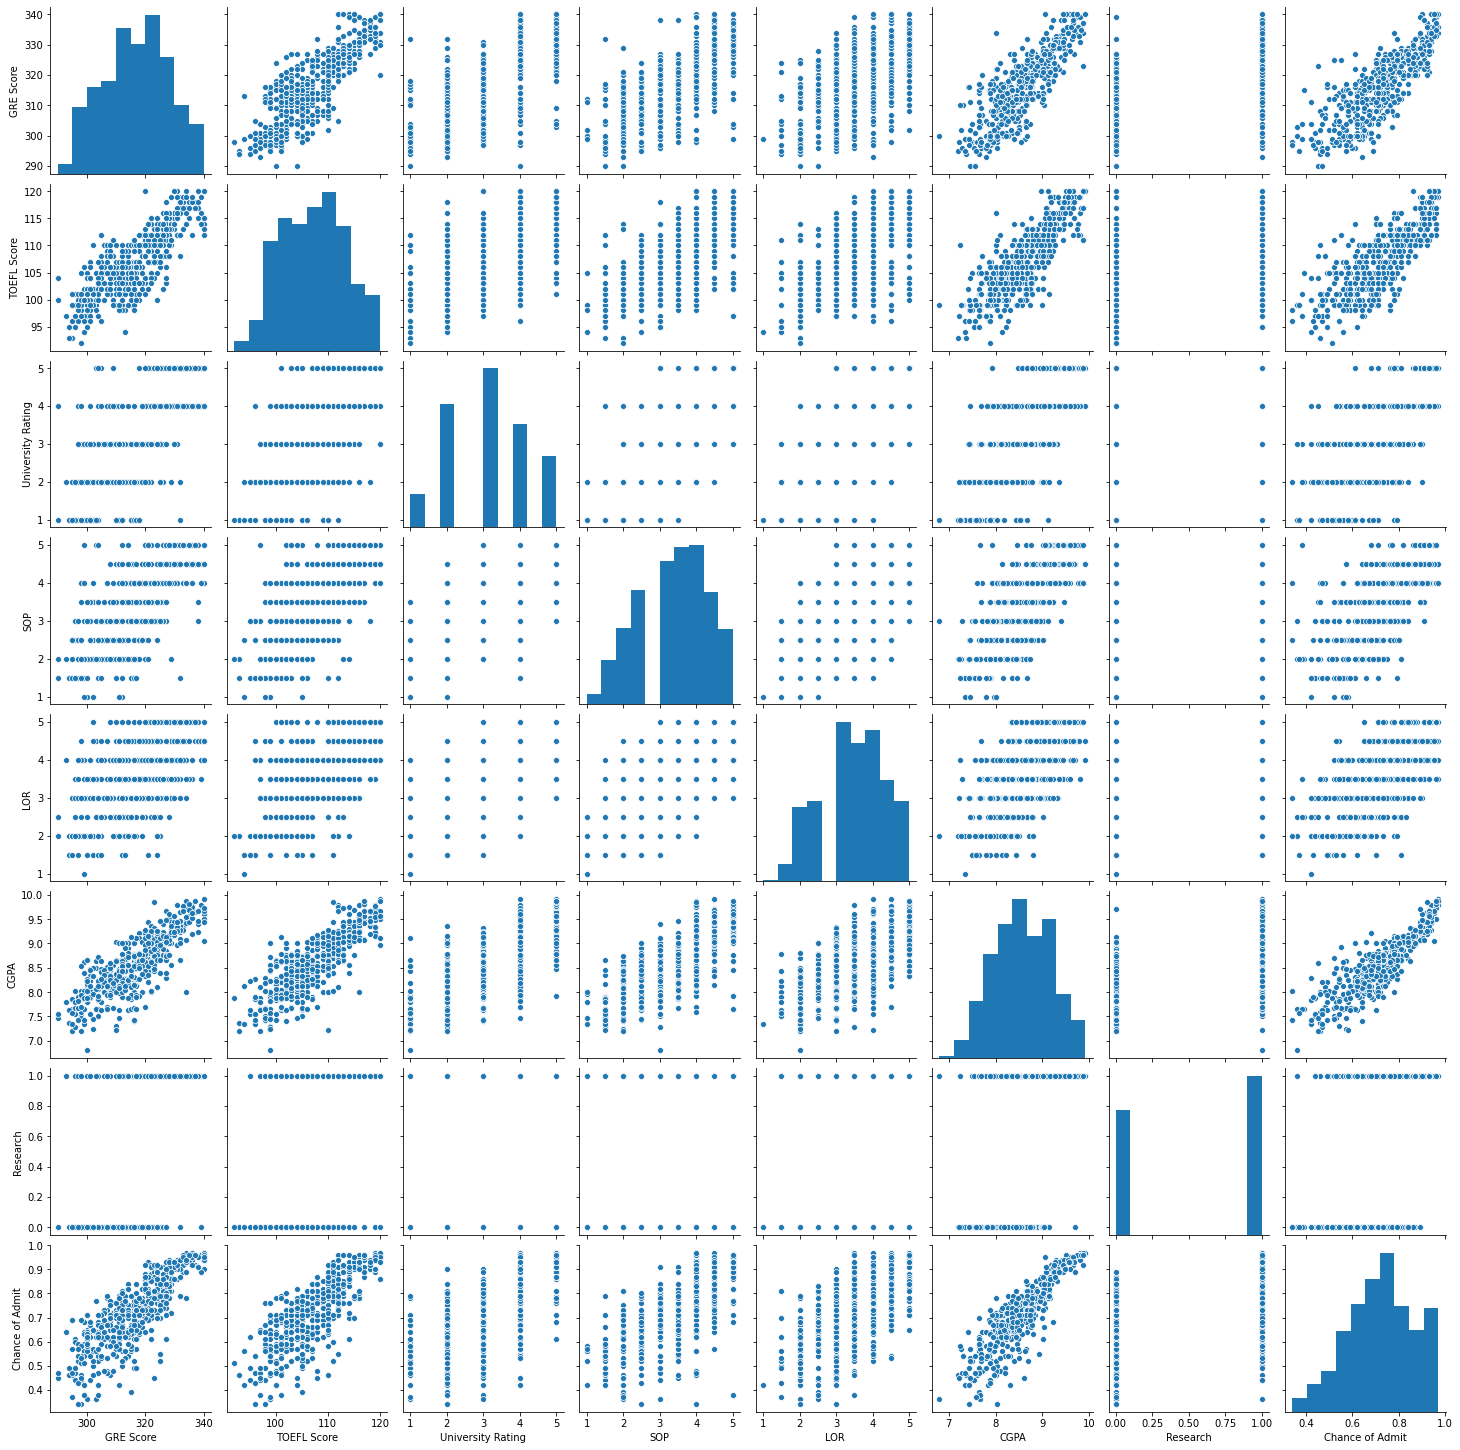

In [9]:
sns.pairplot(dataset)

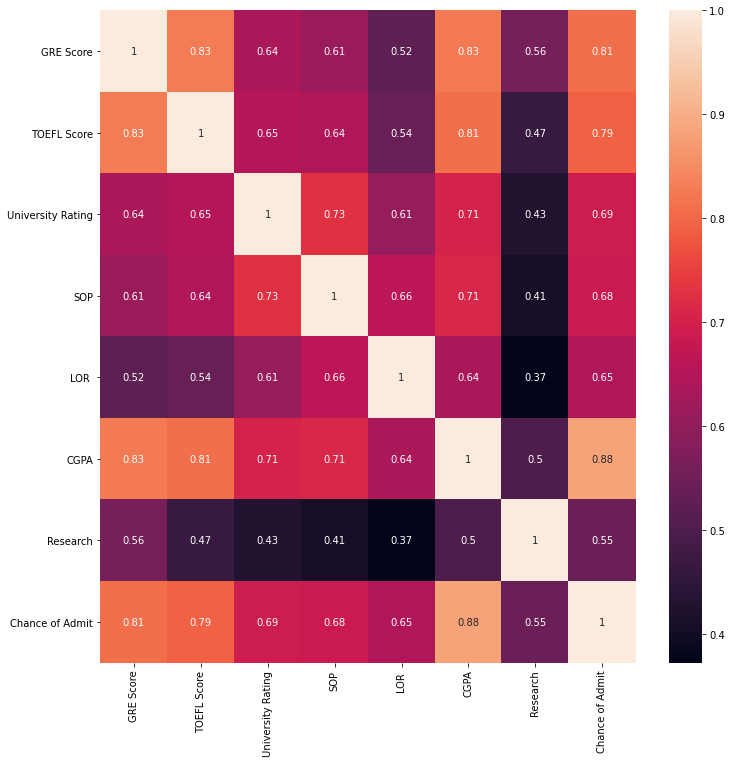

In [10]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True)

# Data Preprocessing

In [11]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 7].values

In [12]:
x = np.array(x)
y = np.array(y)
y = y.reshape(-1,1)
y.shape

(500, 1)

In [36]:
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)

In [40]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)
print("Shape of x_train : \n {}".format(x_train))
print("Shape of y_train : \n {}".format(x_train))
print("Shape of x_test : \n {}".format(x_train))
print("Shape of y_test : \n {}".format(x_train))

Shape of x_train : 
 [[ 1.90785987  1.28510191  1.65095702 ...  1.63976333  1.08168105
   0.88640526]
 [ 0.75577058  0.46216267 -0.97516761 ... -1.06433187  0.30380282
   0.88640526]
 [ 0.48990382 -0.03160087 -0.09979274 ...  0.01730621 -0.19271519
   0.88640526]
 ...
 [-2.34600829 -0.52536441  0.77558214 ... -1.06433187 -1.84777524
  -1.12815215]
 [ 1.99648213  1.94345329  1.65095702 ...  0.55812525  1.85955927
  -1.12815215]
 [ 0.48990382  0.46216267  0.77558214 ...  1.63976333  0.91617504
   0.88640526]]
Shape of y_train : 
 [[ 1.90785987  1.28510191  1.65095702 ...  1.63976333  1.08168105
   0.88640526]
 [ 0.75577058  0.46216267 -0.97516761 ... -1.06433187  0.30380282
   0.88640526]
 [ 0.48990382 -0.03160087 -0.09979274 ...  0.01730621 -0.19271519
   0.88640526]
 ...
 [-2.34600829 -0.52536441  0.77558214 ... -1.06433187 -1.84777524
  -1.12815215]
 [ 1.99648213  1.94345329  1.65095702 ...  0.55812525  1.85955927
  -1.12815215]
 [ 0.48990382  0.46216267  0.77558214 ...  1.63976333  0

# Prediction using Multiple Linear Regression

In [16]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
accuracy = regressor.score(x_test, y_test)

In [61]:
print("Accuracy using Multiple Regression : {0:.2f}".format(accuracy))

Accuracy using Multiple Regression : 0.76


# Prediction using Artificial Neural Network

In [19]:
model = keras.Sequential()
model.add(Dense(50, input_dim = 7))
model.add(Activation('relu'))

model.add(Dense(150))
model.add(Activation('relu'))

model.add(Dense(150))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(Activation('linear'))
model.add(Dense(1))

model.compile(loss = 'mse', optimizer = 'adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                7

In [21]:
prediction = model.fit(x_train, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3172
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1878
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1691
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 0.1578
Epoch 5/100
22/22 [==============================] - 0s 1ms/step - loss: 0.1460
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1404
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1339
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1278
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1378
Epoch 10/100
22/22 [==============================] - 0s 1ms/step - loss: 0.1223
Epoch 11/100
22/22 [==============================] - 0s 1ms/step - loss: 0.1132
Epoch 12/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1246
Epoch 13/100
22/22 [=================

In [63]:
results = model.evaluate(x_test, y_test)
model_accuracy = 1 - results
print("Model Accuracy : {0:.2f}".format(model_accuracy))

3/3 [==============================] - 0s 4ms/step - loss: 0.2976
Model Accuracy : 0.70


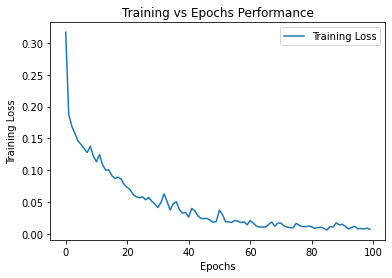

In [24]:
plt.plot(prediction.history['loss'])
plt.title("Training vs Epochs Performance")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])

# Prediction using Decision Tree Regression

In [25]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [64]:
accuracy_dtree = tree_model.score(x_test, y_test)
print("Accuracy of Decision Tree Regression Model : {0:.2f}".format(accuracy_dtree))

Accuracy of Decision Tree Regression Model : 0.65


# Prediction using Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor(n_estimators = 100, max_depth = 10)
randomforest.fit(x_train, y_train)

In [65]:
randomforest_accuracy = randomforest.score(x_test, y_test)
print("Accuracy of Random Forest Model : {0:.2f}".format(randomforest_accuracy))

Accuracy of Random Forest Model : 0.76


# Key Performance Indicators (KPI) for each model

Text(0.5, 1.0, 'Comparing Predicted Results with Ground Truth')

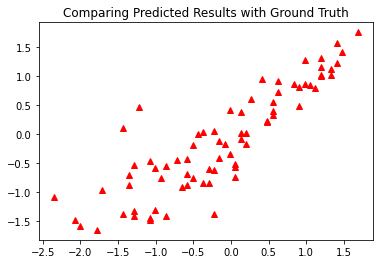

In [53]:
y_predict = regressor.predict(x_test)
plt.plot(y_test, y_predict, '^', color = 'red')
plt.title("Comparing Predicted Results with Ground Truth")

In [51]:
k = x_test.shape[1]
n = len(x_test)
print(n)

75


In [67]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(original_y_test, original_y_pred)), '.3f'))
MSE = mean_squared_error(original_y_test, original_y_pred)
MAE = mean_absolute_error(original_y_test, original_y_pred)
r2=  r2_score(original_y_test, original_y_pred)
adjusted_r2 = 1-(1-r2) * (n-1)/(n-k-1)
print("Root Mean Squared Error : {0:2f}".format(RMSE))
print("Mean Squared Error : {0:2f}".format(MSE))
print("Root Mean Absolute Error : {0:2f}".format(MAE))
print("Adjusted R2 Error : {0:2f}".format(adjusted_r2))

Root Mean Squared Error : 0.475000
Mean Squared Error : 0.225991
Root Mean Absolute Error : 0.356243
Adjusted R2 Error : 0.738442
